# Data distributions

Feb. 2020

Usually, the first step to deal with a dataset is exploring how it is distributed. That is, for each one of its attributes, dividing the range between its maximum and minumun values in intervals and counting how many observations fall in each one of them.

In this notebook it is shown how to visualize or estimate data distributions using the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris) as an example. The Iris dataset has four attributes: sepal length, sepal width, petal length, and petal width, all of them measured in centimeters; and there are three classes: iris-setosa, iris-versicolour, and iris-virginica

In [1]:
# Loading libraries
import matplotlib.pyplot as plt
from sklearn import datasets
from ipywidgets import interact
import ipywidgets as widgets

In [4]:
# Loading the dataset
iris = datasets.load_iris()
labels = ['sepal length', 'sepal width', 'petal length', 'petal width']

One way to visualize data distributions is using histograms.

In [31]:
attributes = [el for el in zip(labels, range(4))]

def f(attr=0, bins=20):
    plt.hist(iris.data[:,attr], bins=bins)
    plt.xlabel('{} (cm)'.format(attributes[attr][0]))
    plt.ylabel('freq')

interact(f, attr=attributes, bins=(10, 100))

interactive(children=(Dropdown(description='attr', options=(('sepal length', 0), ('sepal width', 1), ('petal l…

<function __main__.f(attr=0, bins=20)>

Furthermore, boxplots are useful to compare distribution of two or more attributes.

Text(0, 0.5, 'cm')

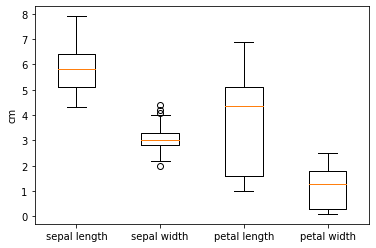

In [28]:
ax = plt.figure().add_subplot(111)
ax.boxplot(iris.data)
ax.set_xticklabels(labels)
ax.set_ylabel('cm')